<a href="https://colab.research.google.com/github/EkanshSaraf/TitanicProblem/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Configuration Path to Kaggle JSON File and Change of Present Working Directory

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/Kaggle_Titanic"

%cd/content/gdrive/MyDrive/Kaggle_Titanic
!pwd

Download Kaggle Dataset to Drive

In [ ]:
!kaggle competitions download -c titanic
!ls

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_train  = pd.read_csv('/content/gdrive/MyDrive/Kaggle_Titanic/train.csv')
df_test = pd.read_csv('/content/gdrive/MyDrive/Kaggle_Titanic/test.csv')

df_comb = pd.concat([df_train,df_test]) #concat the test and train datasets
print(df_comb.shape)
df_comb.info()
#df_comb.describe(include=object)
df_comb.head()

(1309, 12)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
df = df_comb.drop(['Cabin','PassengerId','Name','Ticket'],axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Sex       1309 non-null   object 
 3   Age       1046 non-null   float64
 4   SibSp     1309 non-null   int64  
 5   Parch     1309 non-null   int64  
 6   Fare      1308 non-null   float64
 7   Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 92.0+ KB


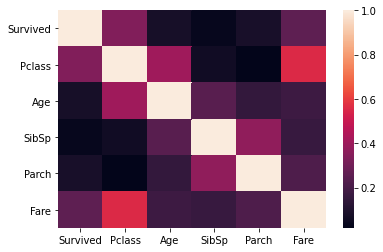

In [12]:
corr_matrix = df.corr().abs()
sns.heatmap(corr_matrix)

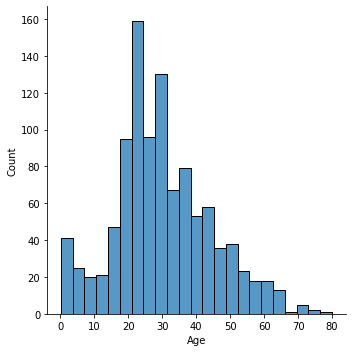

1


In [39]:
sns.displot(x='Age',data=df)
plt.show()


Categorization of Features

In [33]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

discrete_features = [feature for feature in numerical_features if len(df[feature].unique())<25]

continuous_features = [feature for feature in numerical_features if feature not in discrete_features]

categorical_features = list(set(list(df.columns)).difference(set(numerical_features)))